The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

### Preparation
- Create the target variable by mapping yes to 1 and no to 0.
Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution.Use train_test_split funciton for that with random_state=1.

In [309]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [310]:
data=pd.read_csv('AER_credit_card_data.csv')

In [311]:
df=data.copy()
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [312]:
df['target']= (df['card'] == 'yes').astype(int)

In [313]:
df.drop(['card'], inplace= True , axis=1)

In [314]:
df

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,target
0,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12,1
1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13,1
2,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5,1
3,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7,1
4,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19,1
1315,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5,0
1316,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2,1
1317,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7,1


In [315]:
df_full_train, df_val=train_test_split(df, test_size=0.20, random_state=1)

In [316]:
df_train, df_test=train_test_split(df_full_train, test_size=0.25, random_state=1)

In [317]:
y_train=df_train.target.values
y_val=df_val.target.values
y_test=df_test.target.values

In [318]:
del df_train['target']
del df_val['target']
del df_test['target']



In [319]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that <br>

For each numerical variable, use it as score and compute AUC with the card variable. <br>
Use the training dataset for that.  <br>
If your AUC is < 0.5, invert this variable by putting "-" in front  <br>

(e.g. -df_train['expenditure']) <br>

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [320]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reports      791 non-null    int64  
 1   age          791 non-null    float64
 2   income       791 non-null    float64
 3   share        791 non-null    float64
 4   expenditure  791 non-null    float64
 5   owner        791 non-null    object 
 6   selfemp      791 non-null    object 
 7   dependents   791 non-null    int64  
 8   months       791 non-null    int64  
 9   majorcards   791 non-null    int64  
 10  active       791 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 68.1+ KB


In [321]:
df_train.dtypes == np.number

reports        False
age             True
income          True
share           True
expenditure     True
owner          False
selfemp        False
dependents     False
months         False
majorcards     False
active         False
dtype: bool

In [322]:
numerical_features= list(df_train.drop(['owner','selfemp'], axis=1).columns)
numerical_features

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [323]:
from sklearn.metrics import auc, roc_curve

In [324]:
sc=[]
for i in numerical_features:
    print(i)
    fps, tps, thresholds=roc_curve(y_train,df_train[i].values)
    auc1=auc(fps,tps)
    if auc1 < 0.5:
        fps, tps, thresholds=roc_curve(y_train,-df_train[i].values)
        auc1=auc(fps,tps)
    print(auc1)
    print()
    sc.append(auc1)
    

reports
0.7166629860689376

age
0.5240020979407055

income
0.5908049467233478

share
0.989183643423692

expenditure
0.991042345276873

dependents
0.5327757227773791

months
0.5294217780967629

majorcards
0.5343859842838476

active
0.6043173411362006



In [325]:
np.argmax(sc)

4

In [326]:
print(numerical_features[4])

expenditure


In [327]:
from sklearn.metrics import roc_auc_score

In [328]:
for c in numerical_features:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


Since expenditure is not in the list, share is the answer

### Training the model
From now on, use these columns only: <br>

["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"] <br>
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:  <br>

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [329]:
from sklearn.linear_model import LogisticRegression

In [330]:
from sklearn.feature_extraction import DictVectorizer

In [331]:
def encode_and_train (df1, y):
    dictVec=DictVectorizer(sparse=False)
    X_dict=df1.to_dict(orient='records')
    X_train=dictVec.fit_transform(X_dict)
    
    logR=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    logR.fit(X_train,y_train)
    
    return dictVec, logR

In [332]:
dictv0, model=encode_and_train(df_train, y_train)
X_dict_val=df_val.to_dict(orient='records')
X_val=dictv0.transform(X_dict_val)

y_pridected=model.predict_proba(X_val)[:, 1]
y_pridected

array([2.36356852e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99999936e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       5.78398811e-02, 6.60333401e-02, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.17511543e-04, 1.20591533e-01, 1.00000000e+00,
       5.78889947e-02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.96988601e-01, 1.00000000e+00, 9.96331601e-04, 1.00000000e+00,
       1.86266071e-01, 2.33773019e-02, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       5.67994921e-03, 2.11915994e-02, 1.04968772e-01, 1.00000000e+00,
      

In [333]:
y_pridected1=(y_pridected >=0.5).astype(int)
y_pridected1

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

### Question 2
What's the AUC of this model on the validation dataset? (round to 3 digits)

In [334]:
from sklearn.metrics import auc

In [335]:
fpr,tpr, ths=roc_curve(y_val,y_pridected1)

In [336]:
round(auc(fpr,tpr), 3)

0.992

### Question 3
Now let's compute precision and recall for our model. <br>

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01 <br>
For each threshold, compute precision and recall <br>
Plot them <br>
At which threshold precision and recall curves intersect?  <br>

In [337]:
def recall_score(tp,fn):
    return tp / (tp + fn)

def precision_score(tp,fn):
    return tp / (tp + fp)

In [338]:
recall_scores = []
precision_scores = []

thresholds = np.arange(0.0, 1.0, 0.01)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pridected >= t)
    predict_negative = (y_pridected < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    recall_scores.append(recall_score(tp,fn))
    precision_scores.append(precision_score(tp,fn))


In [339]:
import matplotlib.pyplot as plt
 


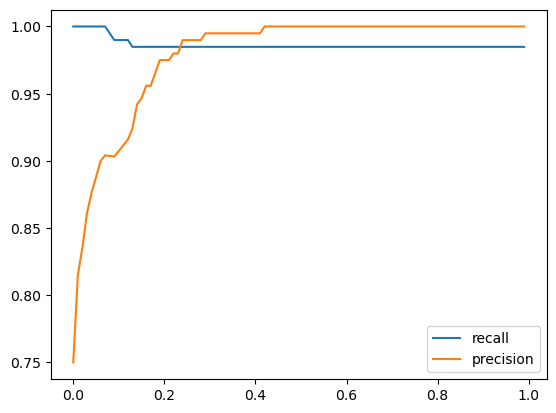

In [340]:
plt.plot(thresholds,recall_scores , label='recall')
plt.plot(thresholds, precision_scores, label='precision')
plt.legend()

At which threshold precision and recall curves intersect? at 0.3

### Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both
<br>
This is the formula for computing F1: <br>

F1 = 2 * P * R / (P + R)  <br>

Where P is precision and R is recall.  <br>

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [341]:
def F1_score(P,R):
    F1 = 2 * P * R / (P + R)
    return F1

In [342]:

F1_scores= []
for i in range(0 , len(recall_scores)):
    F1_scores.append(F1_score(precision_scores[i], recall_scores[i]))

In [343]:
np.argmax(F1_scores)

42

In [344]:
print(f" F1 is maximum at threshold {thresholds[np.argmax(F1_scores)]}")

 F1 is maximum at threshold 0.42


### Question 5
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds: <br>

- KFold(n_splits=5, shuffle=True, random_state=1)
- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

In [345]:
from sklearn.model_selection import KFold

In [346]:
kf=KFold(n_splits=5, shuffle=True, random_state=1)

In [347]:
scores_kfolds=[]
for train_idx, val_idx in kf.split(df_full_train):
    df_train=df_full_train.iloc[train_idx]
    df_val= df_full_train.iloc[val_idx]
    
    y_train=df_train['target']
    y_val=df_val['target']
    
    dictv0, model=encode_and_train(df_train, y_train)
    X_dict_val=df_val.to_dict(orient='records')
    X_val=dictv0.transform(X_dict_val)
    y_predicted=model.predict_proba(X_val)[:,1]
    y_predicted=(y_predicted >=0.5).astype(int)
    fpr,tpr, ths=roc_curve(y_val,y_predicted)
    auc_value=auc(fpr,tpr)
    print(f" AUC: {auc_value}")
    scores_kfolds.append(auc_value)
    
    

    
    

 AUC: 1.0
 AUC: 0.99375
 AUC: 1.0
 AUC: 1.0
 AUC: 1.0


- How large is standard devidation of the AUC scores across different folds?



In [348]:
round(np.std(scores_kfolds) , 4)

0.0025

### Question 6
Now let's use 5-Fold cross-validation to find the best parameter C  <br>

- Iterate over the following C values: [0.01, 0.1, 1, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [349]:
def encode_and_train (df1, y , c):
    dictVec=DictVectorizer(sparse=False)
    X_dict=df1.to_dict(orient='records')
    X_train=dictVec.fit_transform(X_dict)
    
    logR=LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    logR.fit(X_train,y_train)
    
    return dictVec, logR

In [350]:
params_scores_std=[]
params_scores_mean=[]
params_scores=[]

for i in  [0.01, 0.1, 1, 10]:
    scores_kfolds=[]

    for train_idx, val_idx in kf.split(df_full_train):
        df_train=df_full_train.iloc[train_idx]
        df_val= df_full_train.iloc[val_idx]

        y_train=df_train['target']
        y_val=df_val['target']

        dictv0, model=encode_and_train(df_train, y_train,i)
        X_dict_val=df_val.to_dict(orient='records')
        X_val=dictv0.transform(X_dict_val)
        y_predicted=model.predict_proba(X_val)[:,1]
        y_predicted=(y_predicted >=0.5).astype(int)
        fpr,tpr, ths=roc_curve(y_val,y_predicted)
        auc_value=auc(fpr,tpr)
        print(f" AUC: {auc_value}")
        scores_kfolds.append(auc_value)
    
    params_scores.append((round(np.std(scores_kfolds) , 3) , round(np.mean(scores_kfolds) , 3)) )
    params_scores_std.append(round(np.std(scores_kfolds) , 3))
    params_scores_mean.append(round(np.mean(scores_kfolds) , 3))
    

 AUC: 0.9791666666666667
 AUC: 0.98125
 AUC: 0.9848484848484849
 AUC: 0.9908536585365854
 AUC: 0.9970238095238095
 AUC: 0.9791666666666667
 AUC: 0.984375
 AUC: 0.9848484848484849
 AUC: 0.9939024390243902
 AUC: 1.0
 AUC: 1.0
 AUC: 0.99375
 AUC: 1.0
 AUC: 1.0
 AUC: 1.0
 AUC: 1.0
 AUC: 1.0
 AUC: 1.0
 AUC: 1.0
 AUC: 1.0


In [351]:
params_scores

[(0.007, 0.987), (0.007, 0.988), (0.002, 0.999), (0.0, 1.0)]

In [352]:
params_scores_std

[0.007, 0.007, 0.002, 0.0]

In [353]:
params_scores_mean

[0.987, 0.988, 0.999, 1.0]

Which C leads to the best mean score?

In [354]:
[0.01, 0.1, 1, 10][np.argmax(params_scores_mean)]

10

C= 10 is the answer